In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bjk-01-03-24-football-players-data/Bjkson.csv


In [2]:
df = pd.read_csv("/kaggle/input/bjk-01-03-24-football-players-data/Bjkson.csv")

In [3]:
df.shape

(35, 76)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 76 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Name                              35 non-null     object 
 1   Team                              35 non-null     object 
 2   Number                            35 non-null     int64  
 3   Nationality                       35 non-null     object 
 4   Position                          35 non-null     object 
 5   Age                               35 non-null     int64  
 6   Height                            35 non-null     int64  
 7   Last 12 Month Rating              35 non-null     float64
 8   Market Value                      35 non-null     int64  
 9   Total Played This Season          35 non-null     int64  
 10  Started Matchs Number             35 non-null     int64  
 11  Minutes Per Game                  35 non-null     int64  
 12  Team Of Th

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Number,35.0,3.448571e+01,3.171136e+01,1.0,10.500,21.0,6.500000e+01,9.700000e+01
Age,35.0,2.660000e+01,5.298168e+00,16.0,23.000,27.0,3.000000e+01,3.900000e+01
Height,35.0,1.788571e+02,3.168424e+01,0.0,179.500,183.0,1.880000e+02,1.960000e+02
Last 12 Month Rating,35.0,5.360000e+00,2.963498e+00,0.0,6.675,6.9,7.035000e+00,7.220000e+00
Market Value,35.0,3.984171e+07,4.362247e+07,45000.0,632500.000,32000000.0,5.700000e+07,1.790000e+08
...,...,...,...,...,...,...,...,...
Saves,35.0,2.000000e+00,9.009799e+00,0.0,0.000,0.0,0.000000e+00,5.000000e+01
Goals Conceded,35.0,8.857143e-01,4.192230e+00,0.0,0.000,0.0,0.000000e+00,2.400000e+01
Goals Conceded Per Game,35.0,6.000000e-02,2.475765e-01,0.0,0.000,0.0,0.000000e+00,1.100000e+00
Saves from Inside,35.0,1.314286e+00,5.839880e+00,0.0,0.000,0.0,0.000000e+00,3.200000e+01


Age sütununda bir problem var gibi gözüküyor. Kontrol edelim

In [6]:
print(df['Age'])

0     32
1     30
2     24
3     18
4     22
5     16
6     31
7     30
8     25
9     27
10    32
11    25
12    27
13    26
14    30
15    19
16    31
17    39
18    21
19    30
20    29
21    31
22    27
23    24
24    33
25    30
26    28
27    29
28    23
29    20
30    19
31    35
32    23
33    26
34    19
Name: Age, dtype: int64


İnt 64 olması sonucu kesirler kaynaklı bir problem olduğu ortaya çıktı. Aslında deperler doğru

In [7]:
df.columns

Index(['Name', 'Team', 'Number', 'Nationality', 'Position', 'Age', 'Height',
       'Last 12 Month Rating', 'Market Value', 'Total Played This Season',
       'Started Matchs Number', 'Minutes Per Game', 'Team Of The Week',
       'Goals', 'Expected Goals (xG)', 'Goals Per Match', 'Assists',
       'Expected Assists (xA)', 'Touching_Per_Match', 'Shots Per Match',
       'Shots Target Per Match', 'Big Chance Missed', 'Big Chance Created',
       'Possesion Lost', 'Yellow Cards', 'Red Cards', 'Key Passes Per Match',
       'Interceptions Per Match', 'Tackles Per Match',
       'Possession Won Per Match', 'Clearances Per Match', 'Blocks Per Match',
       'Dribbled Past Per Match', 'Penalties Committed',
       'Balls Recovered Per Match', 'Error Led To Goal', 'Error Led To Shot',
       'Success Dribble(/100)', 'Success Dribble Per Match',
       'Aerial Duels Won Per Match', 'Aerial Duels Won (/100)',
       'Accuracy Per Match', 'Accuracy (/100)', 'Accuracy Own Half Per Match',
       

Text(0.5, 1.0, 'Accuracy Opposite Half (/100) vs. Accuracy Opposite Half Per Match')

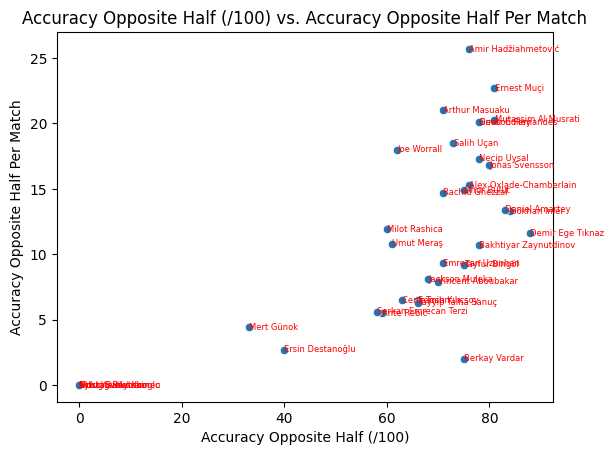

In [8]:
sns.scatterplot(data=df, x="Accuracy Opposite Half (/100)", y="Accuracy Opposite Half Per Match")
for i in range(len(df)):
    plt.text(x=df["Accuracy Opposite Half (/100)"][i]+0.01,  # x koordinatı (+ biraz kaydırma)
             y=df["Accuracy Opposite Half Per Match"][i],  # y koordinatı
             s=df["Name"][i],  # metin (oyuncu ismi)
             fontdict=dict(color='red', size=6),  # metin özellikleri
             va='center')  # dikey hizalama

plt.xlabel("Accuracy Opposite Half (/100)")
plt.ylabel("Accuracy Opposite Half Per Match")
plt.title("Accuracy Opposite Half (/100) vs. Accuracy Opposite Half Per Match")

Oran olarak Demir Ege Tıknaz gayet üst düzey bir seviyede. Ancak ileri alanda pas atma konusunda en yüksek ortalama Amir'e ait. Ancak başarı oranı Demir Ege kadar iyi değil. Demir Ege'ye oranla daha fazla ileri alanda pas yapmış. 

Bu iki oyuncuyu karşılaştıralım.

**6 NUMARA OYUNCULAR**

In [9]:
Acc_Opp_Half_High_Players_name = ["Demir Ege Tıknaz", "Amir Hadžiahmetović"]
Acc_Opp_Half_High_Players = df[df['Name'].isin(Acc_Opp_Half_High_Players_name)][["Name", "Accuracy Opposite Half (/100)", "Accuracy Opposite Half Per Match", "Total Played This Season", "Minutes Per Game","Started Matchs Number"]]

print(Acc_Opp_Half_High_Players)

                   Name  Accuracy Opposite Half (/100)  \
13  Amir Hadžiahmetović                             76   
15     Demir Ege Tıknaz                             88   

    Accuracy Opposite Half Per Match  Total Played This Season  \
13                              25.7                        18   
15                              11.6                        17   

    Minutes Per Game  Started Matchs Number  
13                75                     17  
15                32                      4  


Demir Ege sadece 4 maça ilk 11 oyuncusu olarak çıkmış Amir ise neredeyse maçların tamamına ilk 11 çıkmış. Oyun süresinin etkisini burada göz ardı edemeyiz.
Basit bir hesap yapalım. Amir ileri alanda yaklaşık olarak 462 başarılı pas yapmış. Totalde ileri alanda yaklaşık 607 pas denemesinde bulunmuş. Hatalı pas sayısı yaklaşık 145. 
Demir Ege'ye bakacak olursak ileri alanda yaklaşık olarak 197 başarılı pas yapmış. Totalde ileri alanda yaklaşık 224 pas denemesinde bulunmuş. Hatalı pas sayısı yaklaşık 27.
Demir Ege ileri alanda daha fazla garanti pas atıyor. Tabiki oyuna genellikle sonradan girdiği için yorgun rakiplere karşı ileri alanda pas yaparken Amir'e göre daha rahat olabilir. Ama forma giymenin etkisini illaki görecektir. Çünkü süre açısından Demir Ege totalde 544 dakika süre alırken Amir ise 1350 dakika süre almış. 
Demir Ege, Amir kadar süre alsa oransal olarak 488 başarılı pas yapabilmeli. Tabiki burada oynanan takım, takım arkadaşları, yorgunluk vs. gibi etmenlerde devreye gireceği için Demir Ege Amir'den iyidir diyemeyiz. İkisi de pozisyon olarak 6 numarada oynuyor. Biraz da defansif verilerini de inceleyelim.

In [10]:
Acc_Opp_Half_High_Players_Def = df[df['Name'].isin(Acc_Opp_Half_High_Players_name)][["Name", "Tackles Per Match", "Dribbled Past Per Match" , "Interceptions Per Match", "Clearances Per Match", "Total Played This Season", "Minutes Per Game"]]

print(Acc_Opp_Half_High_Players_Def)


                   Name  Tackles Per Match  Dribbled Past Per Match  \
13  Amir Hadžiahmetović                1.1                      0.9   
15     Demir Ege Tıknaz                0.9                      0.5   

    Interceptions Per Match  Clearances Per Match  Total Played This Season  \
13                      0.8                   0.9                        18   
15                      0.5                   0.4                        17   

    Minutes Per Game  
13                75  
15                32  


Amir defansif anlamda Demir Ege'ye göre çok daha iyi. Sadece Demir Ege'ye göre eksik yanı daha fazla adam kaçırma ortalamasına sahip olması. Tehlike engelleme konusunda da ciddi anlamda Demir Ege'ye göre yüksek bir ortalamaya sahip. Ancak Demir Ege'den çok daha uzun süre alıyor olması bu ortalamaların yüksek olmasının bir sebebi olabilir. Demir Ege de Amir kadar süre aldığı takdirde istatistiksel olarak ona yaklaşabilir. 
Mesela pas arası istatistiğine bakalım. Amir toplamda yaklaşık olarak 15 pas arası yapmış. Yani oynadığı süre bazında hesaplarsak 93 dakikada 1 pas arası yapmış oluyor. 
Demir Ege'ye bakalım. O da toplamda yaklaşık 9 pas arası yapmış. Yani oynadığı süre bazında hesaplarsak 60 dakikada 1 pas arası yapmış oluyor. Ortalamaya bakıldığında yanılabiliriz. Ama alınan süre bazında bakarsak Demir Ege'nin savunma yönüne Amir'den kötü diyemeyiz.

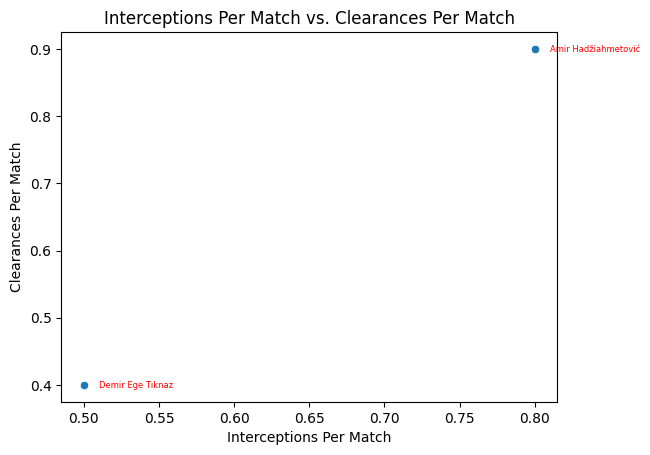

In [11]:
# Scatter plot çizimi
sns.scatterplot(data=Acc_Opp_Half_High_Players_Def, x="Interceptions Per Match", y="Clearances Per Match")

# DataFrame üzerinde iterasyon yaparak her bir oyuncu için metin ekliyoruz
for i in range(len(Acc_Opp_Half_High_Players_Def)):
    plt.text(x=Acc_Opp_Half_High_Players_Def.iloc[i]["Interceptions Per Match"]+0.01,  # x koordinatı (+ biraz kaydırma)
             y=Acc_Opp_Half_High_Players_Def.iloc[i]["Clearances Per Match"],  # y koordinatı
             s=Acc_Opp_Half_High_Players_Def.iloc[i]["Name"],  # metin (oyuncu ismi)
             fontdict=dict(color='red', size=6),  # metin özellikleri
             va='center')  # dikey hizalama

# Eksen isimleri ve başlık ekleniyor
plt.xlabel("Interceptions Per Match")
plt.ylabel("Clearances Per Match")
plt.title("Interceptions Per Match vs. Clearances Per Match")
plt.show()

Görüldüğü gibi ortalama üstünden hesaplanan bir grafik bizi yanıltabilir. Süre bazında grafiğe bakalım.

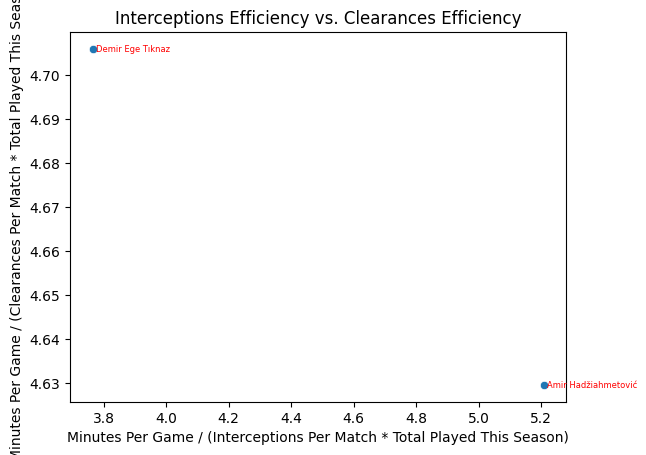

In [12]:
# Yeni değerleri hesapla ve DataFrame'e ekle
Acc_Opp_Half_High_Players_Def['x_value'] = Acc_Opp_Half_High_Players_Def['Minutes Per Game'] / (Acc_Opp_Half_High_Players_Def['Interceptions Per Match'] * Acc_Opp_Half_High_Players_Def['Total Played This Season'])
Acc_Opp_Half_High_Players_Def['y_value'] = Acc_Opp_Half_High_Players_Def['Minutes Per Game'] / (Acc_Opp_Half_High_Players_Def['Clearances Per Match'] * Acc_Opp_Half_High_Players_Def['Total Played This Season'])

# Saçılım grafiği çiz
sns.scatterplot(data=Acc_Opp_Half_High_Players_Def, x="x_value", y="y_value")

# Oyuncu isimlerini noktaların yanına eklemek için plt.text kullan
for i in range(len(Acc_Opp_Half_High_Players_Def)):
    plt.text(x=Acc_Opp_Half_High_Players_Def.iloc[i]["x_value"]+0.01,  # x koordinatı (+ biraz kaydırma)
             y=Acc_Opp_Half_High_Players_Def.iloc[i]["y_value"],  # y koordinatı
             s=Acc_Opp_Half_High_Players_Def.iloc[i]["Name"],  # metin (oyuncu ismi)
             fontdict=dict(color='red', size=6),  # metin özellikleri
             va='center')  # dikey hizalama

# Eksen etiketleri ve başlık ekle
plt.xlabel("Minutes Per Game / (Interceptions Per Match * Total Played This Season)")
plt.ylabel("Minutes Per Game / (Clearances Per Match * Total Played This Season)")
plt.title("Interceptions Efficiency vs. Clearances Efficiency")

# Grafiği göster
plt.show()

Tehlike Engelleme konusunda ve top arası konusunda ikisi arasında da bariz bir fark var. Ancak Demir Ege 8 ağrılıklı bir futbolcu ve zaman zaman çapa 6 oynarken, Amir derin oyun kurucu yani 6 numarayı ağırlıkla oynarken nadiren 8 oynadığı da oluyordu. Bu sebeple istatistiksel anlamda aralarında bir fark olması durumu normal. Diğer istatistiklere bakalım.

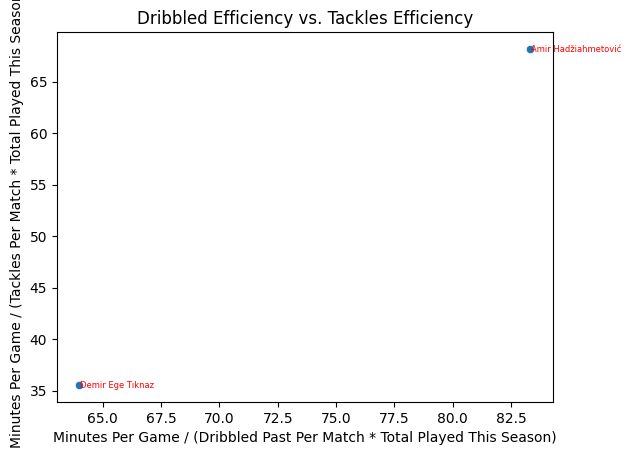

In [13]:
# Yeni değerleri hesapla ve DataFrame'e ekle
Acc_Opp_Half_High_Players_Def['x_value'] = Acc_Opp_Half_High_Players_Def['Minutes Per Game'] / (Acc_Opp_Half_High_Players_Def['Dribbled Past Per Match'])
Acc_Opp_Half_High_Players_Def['y_value'] = Acc_Opp_Half_High_Players_Def['Minutes Per Game'] / (Acc_Opp_Half_High_Players_Def['Tackles Per Match'])

# Saçılım grafiği çiz
sns.scatterplot(data=Acc_Opp_Half_High_Players_Def, x="x_value", y="y_value")

# Oyuncu isimlerini noktaların yanına eklemek için plt.text kullan
for i in range(len(Acc_Opp_Half_High_Players_Def)):
    plt.text(x=Acc_Opp_Half_High_Players_Def.iloc[i]["x_value"]+0.01,  # x koordinatı (+ biraz kaydırma)
             y=Acc_Opp_Half_High_Players_Def.iloc[i]["y_value"],  # y koordinatı
             s=Acc_Opp_Half_High_Players_Def.iloc[i]["Name"],  # metin (oyuncu ismi)
             fontdict=dict(color='red', size=6),  # metin özellikleri
             va='center')  # dikey hizalama

# Eksen etiketleri ve başlık ekle
plt.xlabel("Minutes Per Game / (Dribbled Past Per Match * Total Played This Season)")
plt.ylabel("Minutes Per Game / (Tackles Per Match * Total Played This Season)")
plt.title("Dribbled Efficiency vs. Tackles Efficiency")

# Grafiği göster
plt.show()

Amir, Demir Ege'ye göre top çalma konusunda daha iyi gibi. Ancak adam kaçırma sayısına bakacak olursak Amir, Ege'ye göre markaj konusunda biraz eksik gibi. Amir topa müdahale eden bir savunma anlayışı izlerken Demir Ege daha çok topu ayakta savunan bir savunma anlayışı izliyor olabilir. Analizin ilerleyen aşamalarında yapılan faul sayılarını da inceleyerek bu kanıyı kesinleştireceğiz ya da yalanlayacağız.
Peki faul konusuna gelecek olursak ne durumdalar?

In [14]:
Acc_Opp_Half_High_Players_Foul = df[df['Name'].isin(Acc_Opp_Half_High_Players_name)][["Name", "Fouls Per Match", "Yellow Cards" , "Red Cards", "Penalties Committed", "Was Fouled Per Match", "Total Played This Season", "Minutes Per Game"]]

print(Acc_Opp_Half_High_Players_Foul)


                   Name  Fouls Per Match  Yellow Cards  Red Cards  \
13  Amir Hadžiahmetović              0.9             0          1   
15     Demir Ege Tıknaz              0.8             0          0   

    Penalties Committed  Was Fouled Per Match  Total Played This Season  \
13                    1                   0.9                        18   
15                    0                   0.3                        17   

    Minutes Per Game  
13                75  
15                32  


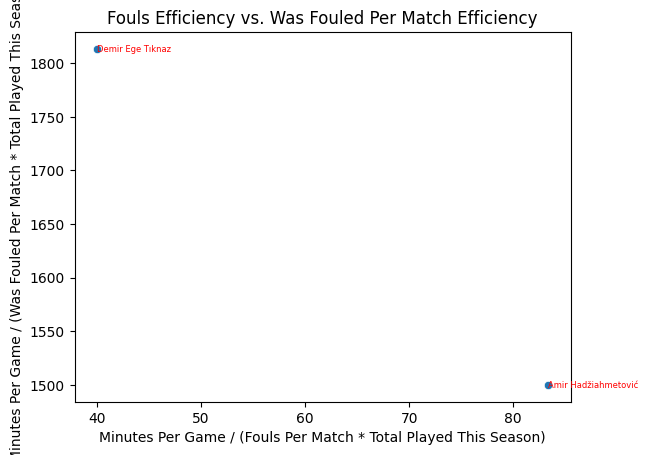

In [15]:
# Yeni değerleri hesapla ve DataFrame'e ekle
Acc_Opp_Half_High_Players_Foul['x_value'] = Acc_Opp_Half_High_Players_Foul['Minutes Per Game'] * Acc_Opp_Half_High_Players_Foul['Total Played This Season'] / (Acc_Opp_Half_High_Players_Foul['Fouls Per Match'] * Acc_Opp_Half_High_Players_Foul['Total Played This Season'] )
Acc_Opp_Half_High_Players_Foul['y_value'] = Acc_Opp_Half_High_Players_Foul['Minutes Per Game'] / (Acc_Opp_Half_High_Players_Foul['Was Fouled Per Match']) * Acc_Opp_Half_High_Players_Foul['Total Played This Season']

# Saçılım grafiği çiz
sns.scatterplot(data=Acc_Opp_Half_High_Players_Foul, x="x_value", y="y_value")

# Oyuncu isimlerini noktaların yanına eklemek için plt.text kullan
for i in range(len(Acc_Opp_Half_High_Players_Foul)):
    plt.text(x=Acc_Opp_Half_High_Players_Foul.iloc[i]["x_value"]+0.01,  # x koordinatı (+ biraz kaydırma)
             y=Acc_Opp_Half_High_Players_Foul.iloc[i]["y_value"],  # y koordinatı
             s=Acc_Opp_Half_High_Players_Foul.iloc[i]["Name"],  # metin (oyuncu ismi)
             fontdict=dict(color='red', size=6),  # metin özellikleri
             va='center')  # dikey hizalama

# Eksen etiketleri ve başlık ekle
plt.xlabel("Minutes Per Game / (Fouls Per Match * Total Played This Season)")
plt.ylabel("Minutes Per Game / (Was Fouled Per Match * Total Played This Season)")
plt.title("Fouls Efficiency vs. Was Fouled Per Match Efficiency")

# Grafiği göster
plt.show()

Demir Ege daha az faule uğramış ancak Amir'e göre daha fazla faul yapmaya meyilli. Bu da demektir ki Amir'e göre daha az müdahalede bulunuyor olmasının sebebi savunma anlayışı değil topa müdahale konusundaki zayıflığı. Çünkü Amir nerdeyse Demir Ege'ye göre yarı sıklıkta topa müdahalede bulunuyor.

Bir de bu oyuncuları atak yönünden karşılaştıralım.

In [16]:
df.columns

Index(['Name', 'Team', 'Number', 'Nationality', 'Position', 'Age', 'Height',
       'Last 12 Month Rating', 'Market Value', 'Total Played This Season',
       'Started Matchs Number', 'Minutes Per Game', 'Team Of The Week',
       'Goals', 'Expected Goals (xG)', 'Goals Per Match', 'Assists',
       'Expected Assists (xA)', 'Touching_Per_Match', 'Shots Per Match',
       'Shots Target Per Match', 'Big Chance Missed', 'Big Chance Created',
       'Possesion Lost', 'Yellow Cards', 'Red Cards', 'Key Passes Per Match',
       'Interceptions Per Match', 'Tackles Per Match',
       'Possession Won Per Match', 'Clearances Per Match', 'Blocks Per Match',
       'Dribbled Past Per Match', 'Penalties Committed',
       'Balls Recovered Per Match', 'Error Led To Goal', 'Error Led To Shot',
       'Success Dribble(/100)', 'Success Dribble Per Match',
       'Aerial Duels Won Per Match', 'Aerial Duels Won (/100)',
       'Accuracy Per Match', 'Accuracy (/100)', 'Accuracy Own Half Per Match',
       

In [17]:
Acc_Opp_Half_High_Players_Attack = df[df['Name'].isin(Acc_Opp_Half_High_Players_name)][["Name", "Expected Goals (xG)", "Goals" , "Assists", "Expected Assists (xA)", "Touching_Per_Match", "Shots Per Match", "Shots Target Per Match", "Minutes Per Game", "Big Chance Missed", "Big Chance Created", "Key Passes Per Match","Success Dribble(/100)","Success Dribble Per Match","Accuracy Per Match","Accuracy (/100)","Accuracy Long Ball Per Match","Accuracy Long Ball (/100)","Total Played This Season","Accuracy Crosses Per Match","Accuracy Crosses (/100)"]]

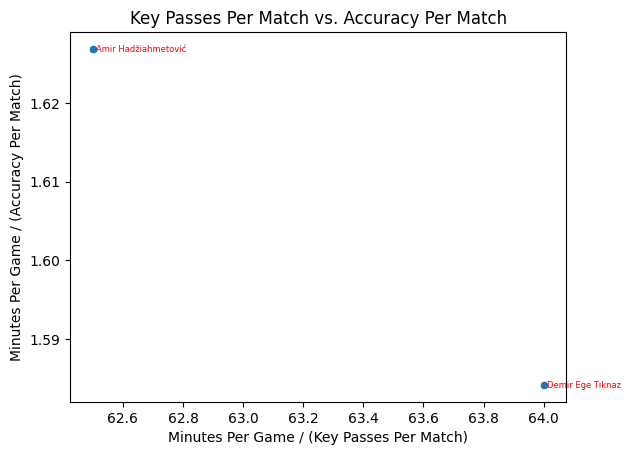

In [18]:
# Yeni değerleri hesapla ve DataFrame'e ekle
Acc_Opp_Half_High_Players_Attack['x_value'] = Acc_Opp_Half_High_Players_Attack['Minutes Per Game']* Acc_Opp_Half_High_Players_Attack['Total Played This Season'] / (Acc_Opp_Half_High_Players_Attack['Key Passes Per Match'] * Acc_Opp_Half_High_Players_Attack['Total Played This Season'] )
Acc_Opp_Half_High_Players_Attack['y_value'] = Acc_Opp_Half_High_Players_Attack['Minutes Per Game']* Acc_Opp_Half_High_Players_Attack['Total Played This Season'] / (Acc_Opp_Half_High_Players_Attack['Accuracy Per Match']* Acc_Opp_Half_High_Players_Attack['Total Played This Season'])

# Saçılım grafiği çiz
sns.scatterplot(data=Acc_Opp_Half_High_Players_Attack, x="x_value", y="y_value")

# Oyuncu isimlerini noktaların yanına eklemek için plt.text kullan
for i in range(len(Acc_Opp_Half_High_Players_Attack)):
    plt.text(x=Acc_Opp_Half_High_Players_Attack.iloc[i]["x_value"]+0.01,  # x koordinatı (+ biraz kaydırma)
             y=Acc_Opp_Half_High_Players_Attack.iloc[i]["y_value"],  # y koordinatı
             s=Acc_Opp_Half_High_Players_Attack.iloc[i]["Name"],  # metin (oyuncu ismi)
             fontdict=dict(color='red', size=6),  # metin özellikleri
             va='center')  # dikey hizalama

# Eksen etiketleri ve başlık ekle
plt.xlabel("Minutes Per Game / (Key Passes Per Match)")
plt.ylabel("Minutes Per Game / (Accuracy Per Match)")
plt.title("Key Passes Per Match vs. Accuracy Per Match")

# Grafiği göster
plt.show()

Amir 1.6 dakikada bir olacak şekilde isabetli pas atarken Demir Ege için bu süre daha az. Ancak kilit pas konusunda da Amir, Demir Ege'ye göre daha iyi bir konumda. Tabiki karşılaştırılan iki değer de birbiriyle alakasız veya birbirinden çok uzak değerler değil. 

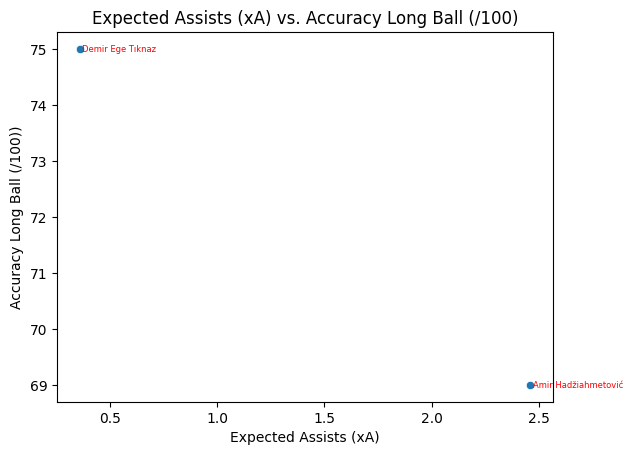

In [19]:
# Yeni değerleri hesapla ve DataFrame'e ekle
Acc_Opp_Half_High_Players_Attack['x_value'] = Acc_Opp_Half_High_Players_Attack['Expected Assists (xA)']
Acc_Opp_Half_High_Players_Attack['y_value'] = Acc_Opp_Half_High_Players_Attack['Accuracy Long Ball (/100)']

# Saçılım grafiği çiz
sns.scatterplot(data=Acc_Opp_Half_High_Players_Attack, x="x_value", y="y_value")

# Oyuncu isimlerini noktaların yanına eklemek için plt.text kullan
for i in range(len(Acc_Opp_Half_High_Players_Attack)):
    plt.text(x=Acc_Opp_Half_High_Players_Attack.iloc[i]["x_value"]+0.01,  # x koordinatı (+ biraz kaydırma)
             y=Acc_Opp_Half_High_Players_Attack.iloc[i]["y_value"],  # y koordinatı
             s=Acc_Opp_Half_High_Players_Attack.iloc[i]["Name"],  # metin (oyuncu ismi)
             fontdict=dict(color='red', size=6),  # metin özellikleri
             va='center')  # dikey hizalama

# Eksen etiketleri ve başlık ekle
plt.xlabel("Expected Assists (xA)")
plt.ylabel("Accuracy Long Ball (/100))")
plt.title("Expected Assists (xA) vs. Accuracy Long Ball (/100)")

# Grafiği göster
plt.show()

Atılan uzun toplar konusunda Demir Ege'nin Amir'e göre ciddi bir farkı var. Ama Demir Ege'nin asist beklentisi Amir'e göre neredeyse %20 oranında. Bunun sebeplerinden birisi Demir Ege her ne kadar 6'dan ziyade 8 kapsamında bir orta saha olsa bile attığı uzun paslar genellikle savunma hattını kıran ya da çok tehlike yaratan toplar olmayabilir. Birazdan yaptıkları ortalar ve maç başına uzun top sayılarını incelediğimizde biraz daha kesin bir sonuca varabiliriz.

In [20]:
Acc_Opp_Half_High_Players_Attack.columns

Index(['Name', 'Expected Goals (xG)', 'Goals', 'Assists',
       'Expected Assists (xA)', 'Touching_Per_Match', 'Shots Per Match',
       'Shots Target Per Match', 'Minutes Per Game', 'Big Chance Missed',
       'Big Chance Created', 'Key Passes Per Match', 'Success Dribble(/100)',
       'Success Dribble Per Match', 'Accuracy Per Match', 'Accuracy (/100)',
       'Accuracy Long Ball Per Match', 'Accuracy Long Ball (/100)',
       'Total Played This Season', 'Accuracy Crosses Per Match',
       'Accuracy Crosses (/100)', 'x_value', 'y_value'],
      dtype='object')

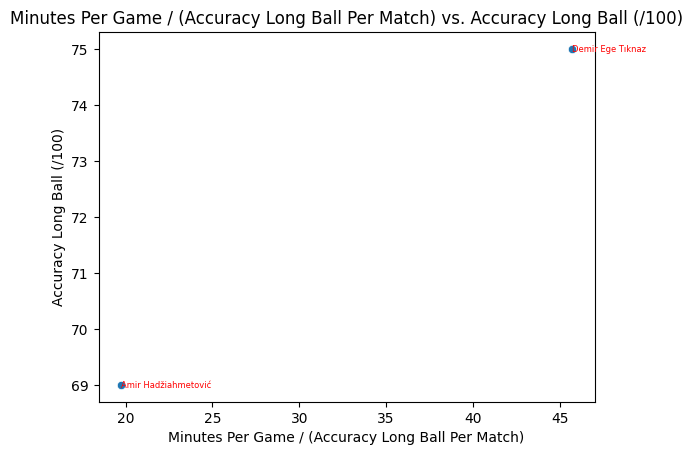

In [21]:
# Yeni değerleri hesapla ve DataFrame'e ekle
Acc_Opp_Half_High_Players_Attack['x_value'] = Acc_Opp_Half_High_Players_Attack['Minutes Per Game']* Acc_Opp_Half_High_Players_Attack['Total Played This Season'] / (Acc_Opp_Half_High_Players_Attack['Accuracy Long Ball Per Match'] * Acc_Opp_Half_High_Players_Attack['Total Played This Season'] )
Acc_Opp_Half_High_Players_Attack['y_value'] = Acc_Opp_Half_High_Players_Attack['Accuracy Long Ball (/100)']

# Saçılım grafiği çiz
sns.scatterplot(data=Acc_Opp_Half_High_Players_Attack, x="x_value", y="y_value")

# Oyuncu isimlerini noktaların yanına eklemek için plt.text kullan
for i in range(len(Acc_Opp_Half_High_Players_Attack)):
    plt.text(x=Acc_Opp_Half_High_Players_Attack.iloc[i]["x_value"]+0.01,  # x koordinatı (+ biraz kaydırma)
             y=Acc_Opp_Half_High_Players_Attack.iloc[i]["y_value"],  # y koordinatı
             s=Acc_Opp_Half_High_Players_Attack.iloc[i]["Name"],  # metin (oyuncu ismi)
             fontdict=dict(color='red', size=6),  # metin özellikleri
             va='center')  # dikey hizalama

# Eksen etiketleri ve başlık ekle
plt.xlabel("Minutes Per Game / (Accuracy Long Ball Per Match)")
plt.ylabel("Accuracy Long Ball (/100)")
plt.title("Minutes Per Game / (Accuracy Long Ball Per Match) vs. Accuracy Long Ball (/100)")

# Grafiği göster
plt.show()

Buradan da anlaşılacağı üzere Demir Ege, Amir'e göre çok nadiren uzun top deniyor. Bu sebeple Amir'in oranlarında bir düşüklük oluyor olabilir. Derin Oyun Kurucu olarak oynayan Amir'in en önemli görevi oyunu ileriye açmak olduğu için çok daha fazla topu uzun oynamak durumunda. Ve neredeyse maç başına 5'e yakın bir başarılı uzun pas sayısına sahip. Ancak Demir Ege daha 8'e dönük bir oyuncu olduğu için ve Amir'in oynadığı pozisyonda oynasa bile daha sık ileri çıkıyor olmasından dolayı uzun top kullanma durumuna pek ihtiyacı kalmamış gibi. 

Demir Ege maç başına tahmini 3 uzun top denemiş 2'si başarılı olmuş. Ama Amir maç başına yaklaşık 6 uzun top denemesinde bulunmuuş. Ve bunların yaklaşık 4'ü başarılı olmuş. Tabiki oynanan futbolda rakip oyuncuların Amir'i kilit oyuncu olarak görüp onun pas opsiyonlarını azaltmaları da bu istatistiği açıklayabilecek bir durumdur

Şimdi gole katkı konusuna gelecek olursak Amir 6 numara, Demir Ege 8 olmasına rağmen aralarında bariz bir Asist Beklentisi farkı var. Hem de 4-5 kat gibi ciddi bir fark. Tabiki karşılaştıracak olursak Demir Ege, Amir'e kıyasla daha çok kendi takımının yorulmuş olduğu, ve hatta bazen takımının top oyaladığı, son dakikalarda oyuna giriyor. Karşılaştırmaya geçmeden önce bunu belirtmekte fayda var. Orta konusunu biraz inceleyelim.

In [22]:
Acc_Opp_Half_High_Players_Attack.columns

Index(['Name', 'Expected Goals (xG)', 'Goals', 'Assists',
       'Expected Assists (xA)', 'Touching_Per_Match', 'Shots Per Match',
       'Shots Target Per Match', 'Minutes Per Game', 'Big Chance Missed',
       'Big Chance Created', 'Key Passes Per Match', 'Success Dribble(/100)',
       'Success Dribble Per Match', 'Accuracy Per Match', 'Accuracy (/100)',
       'Accuracy Long Ball Per Match', 'Accuracy Long Ball (/100)',
       'Total Played This Season', 'Accuracy Crosses Per Match',
       'Accuracy Crosses (/100)', 'x_value', 'y_value'],
      dtype='object')

/opt/conda/lib/python3.10/site-packages/matplotlib/transforms.py:365: RuntimeWarning: invalid value encountered in scalar subtract
  return points[1, 0] - points[0, 0]


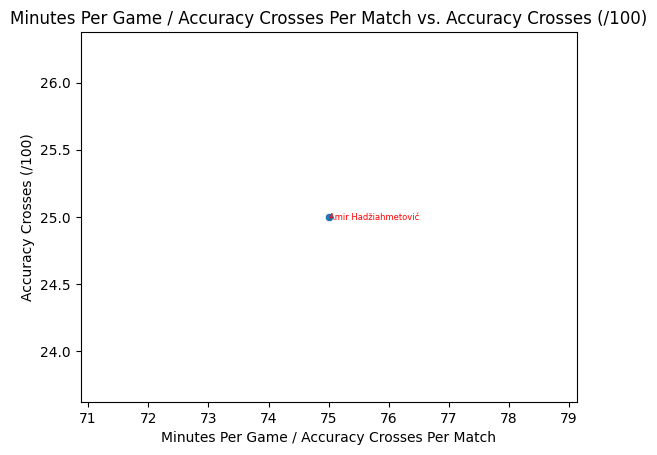

In [23]:
# Yeni değerleri hesapla ve DataFrame'e ekle
Acc_Opp_Half_High_Players_Attack['x_value'] = Acc_Opp_Half_High_Players_Attack['Minutes Per Game']* Acc_Opp_Half_High_Players_Attack['Total Played This Season'] / (Acc_Opp_Half_High_Players_Attack['Accuracy Crosses Per Match'] * Acc_Opp_Half_High_Players_Attack['Total Played This Season'] )
Acc_Opp_Half_High_Players_Attack['y_value'] = Acc_Opp_Half_High_Players_Attack['Accuracy Crosses (/100)']

# Saçılım grafiği çiz
sns.scatterplot(data=Acc_Opp_Half_High_Players_Attack, x="x_value", y="y_value")

# Oyuncu isimlerini noktaların yanına eklemek için plt.text kullan
for i in range(len(Acc_Opp_Half_High_Players_Attack)):
    plt.text(x=Acc_Opp_Half_High_Players_Attack.iloc[i]["x_value"]+0.01,  # x koordinatı (+ biraz kaydırma)
             y=Acc_Opp_Half_High_Players_Attack.iloc[i]["y_value"],  # y koordinatı
             s=Acc_Opp_Half_High_Players_Attack.iloc[i]["Name"],  # metin (oyuncu ismi)
             fontdict=dict(color='red', size=6),  # metin özellikleri
             va='center')  # dikey hizalama

# Eksen etiketleri ve başlık ekle
plt.xlabel("Minutes Per Game / Accuracy Crosses Per Match")
plt.ylabel("Accuracy Crosses (/100)")
plt.title("Minutes Per Game / Accuracy Crosses Per Match vs. Accuracy Crosses (/100)")

# Grafiği göster
plt.show()

Burada değişik bir isatatistik karşımıza çıktı. Demir Ege'nin bu sezon açtığı bir başarılı orta yok. Ya da hiç orta denemesinde bulunmamış. Amir ise 4'te bir gibi bir isabet oranıyla karşımıza çıkıyor. Ancak bu oranın düşük olmasındaki bir sebep de korner ve frikik organizasyonlarında duran topun başına Amir'in geçiyor olması olabilir. Bir ikinci bir konu olarak Demir Ege ciddi bir boy avantajına sahip olduğu için orta açan değil orta açılan oyuncu olabilir.

Yani sonuç olarak:
* Aralarında ciddi bir kalite farkı istatiksel anlamda çok fazla mevcut değil. Çünkü iki oyuncunun da birbirinden üstün olduğu yönleri var
* Demir Ege, Amir'e göre çok daha az dakika süre aldığı için henüz oyun anlamında ciddi eksiklikleri olabilir. Çünkü oyun zekası oyunun içinde kazanılabilecek bir kabiliyettir.
* Harici olarak Amir, Demir Ege'ye göre daha yaşlı bir oyuncu. Oyun tecrübesi ve soğukkanlılık konularında profesyonel olarak daha fazla maça çıkıyor olmanın avantajına sahip.


Peki şimdi bu oyuncuları yeni 6-8 transferi Al Musrati ile karşılaştıralım.

**YENİ TRANSFER AL MUSRATİ**

In [24]:
#Öncelikle Al Musrati, Demir Ege ve Amir için olan verileri alalım.
Al_Musrati_Demir_Amir = ["Demir Ege Tıknaz", "Amir Hadžiahmetović", "Mutassim Al Musrati"]
Al_Musrati_Demir_Amir = df[df['Name'].isin(Al_Musrati_Demir_Amir)][["Name", "Expected Goals (xG)", "Goals" , "Assists", "Expected Assists (xA)", "Touching_Per_Match", "Shots Per Match", "Shots Target Per Match", "Minutes Per Game", "Big Chance Missed", "Big Chance Created", "Key Passes Per Match","Success Dribble(/100)","Success Dribble Per Match","Accuracy Per Match","Accuracy (/100)","Accuracy Long Ball Per Match","Accuracy Long Ball (/100)","Total Played This Season","Accuracy Crosses Per Match","Accuracy Crosses (/100)","Yellow Cards" , "Red Cards", "Penalties Committed", "Was Fouled Per Match","Tackles Per Match", "Dribbled Past Per Match" , "Interceptions Per Match", "Clearances Per Match","Possession Won Per Match","Accuracy Own Half Per Match","Accuracy Own Half (/100)", "Accuracy Opposite Half Per Match","Accuracy Opposite Half (/100)"]]

print(Al_Musrati_Demir_Amir)

                   Name  Expected Goals (xG)  Goals  Assists  \
12  Mutassim Al Musrati                 0.07      0        0   
13  Amir Hadžiahmetović                 0.30      0        4   
15     Demir Ege Tıknaz                 0.31      0        1   

    Expected Assists (xA)  Touching_Per_Match  Shots Per Match  \
12                   0.06                59.7              0.7   
13                   2.46                64.7              0.2   
15                   0.36                27.9              0.3   

    Shots Target Per Match  Minutes Per Game  Big Chance Missed  ...  \
12                     0.3                68                  0  ...   
13                     0.1                75                  0  ...   
15                     0.1                32                  0  ...   

    Was Fouled Per Match  Tackles Per Match  Dribbled Past Per Match  \
12                   0.3                0.3                      1.0   
13                   0.9                1.1  

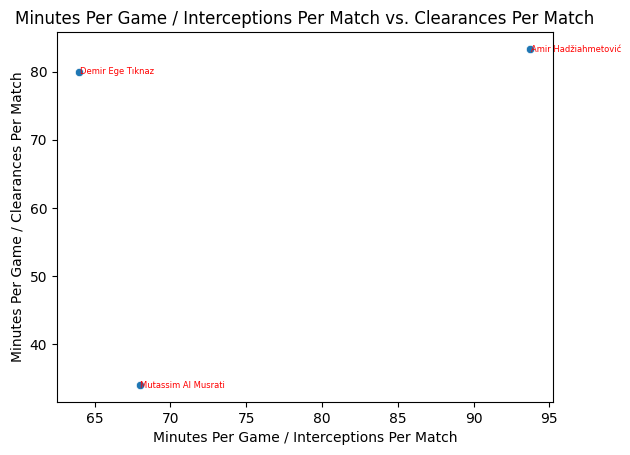

In [25]:
# Yeni değerleri hesapla ve DataFrame'e ekle
Al_Musrati_Demir_Amir['x_value'] = (Al_Musrati_Demir_Amir['Minutes Per Game']) / ((Al_Musrati_Demir_Amir['Interceptions Per Match'] ))
Al_Musrati_Demir_Amir['y_value'] = (Al_Musrati_Demir_Amir['Minutes Per Game']* Al_Musrati_Demir_Amir['Total Played This Season']) / ((Al_Musrati_Demir_Amir['Clearances Per Match'] * Al_Musrati_Demir_Amir['Total Played This Season'] ))

# Saçılım grafiği çiz
sns.scatterplot(data=Al_Musrati_Demir_Amir, x="x_value", y="y_value")

# Oyuncu isimlerini noktaların yanına eklemek için plt.text kullan
for i in range(len(Al_Musrati_Demir_Amir)):
    plt.text(x=Al_Musrati_Demir_Amir.iloc[i]["x_value"]+0.01,  # x koordinatı (+ biraz kaydırma)
             y=Al_Musrati_Demir_Amir.iloc[i]["y_value"],  # y koordinatı
             s=Al_Musrati_Demir_Amir.iloc[i]["Name"],  # metin (oyuncu ismi)
             fontdict=dict(color='red', size=6),  # metin özellikleri
             va='center')  # dikey hizalama

# Eksen etiketleri ve başlık ekle
plt.xlabel("Minutes Per Game / Interceptions Per Match")
plt.ylabel("Minutes Per Game / Clearances Per Match")
plt.title("Minutes Per Game / Interceptions Per Match vs. Clearances Per Match")

# Grafiği göster
plt.show()

Pas arası konusunda Demir Ege diğer iki oyuncuya göre de gayet başarılı. Ancak Al Musrati ile arasında ciddi bir fark yok. Fakat tehlike engelleme konusunda Al Musrati diğer iki oyuncuya göre ciddi bir farkla önde. Ve bu istatistik neredeyse iki katı kadar olacak şekilde. Defansif anlamda Al Musrati diğer iki oyuncuya göre iyi bir seviyede diyebiliriz. Pas arası konusunda Demir Ege, Al Musrati'ye göre daha önde olsa bile aralarında ciddi bir fark yok. Biraz da oyuncuların top çalma ve kazanılan pozisyon sayılarını inceleyelim.

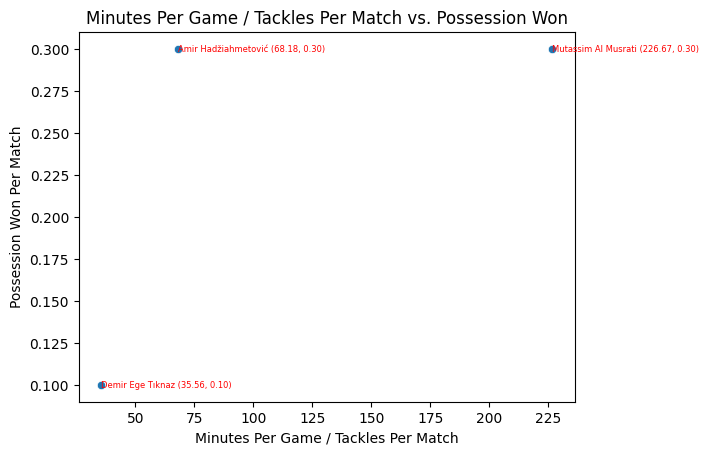

In [26]:
# Yeni değerleri hesapla ve DataFrame'e ekle
Al_Musrati_Demir_Amir['x_value1'] = (Al_Musrati_Demir_Amir['Minutes Per Game']) / ((Al_Musrati_Demir_Amir['Tackles Per Match']))
Al_Musrati_Demir_Amir['y_value1'] = ((Al_Musrati_Demir_Amir['Possession Won Per Match']))

# Saçılım grafiği çiz
sns.scatterplot(data=Al_Musrati_Demir_Amir, x="x_value1", y="y_value1")

# Oyuncu isimlerini ve değerlerini noktaların yanına eklemek için plt.text kullan
for i in range(len(Al_Musrati_Demir_Amir)):
    plt.text(x=Al_Musrati_Demir_Amir.iloc[i]["x_value1"]+0.01,  # x koordinatı (+ biraz kaydırma)
             y=Al_Musrati_Demir_Amir.iloc[i]["y_value1"],  # y koordinatı
             s=f"{Al_Musrati_Demir_Amir.iloc[i]['Name']} ({Al_Musrati_Demir_Amir.iloc[i]['x_value1']:.2f}, {Al_Musrati_Demir_Amir.iloc[i]['y_value1']:.2f})",  # metin (oyuncu ismi ve değerler)
             fontdict=dict(color='red', size=6),  # metin özellikleri
             va='center')  # dikey hizalama

# Eksen etiketleri ve başlık ekle
plt.xlabel("Minutes Per Game / Tackles Per Match")
plt.ylabel("Possession Won Per Match")
plt.title("Minutes Per Game / Tackles Per Match vs. Possession Won")

# Grafiği göster
plt.show()


Al Musrati top çalma konusunda ciddi bir eksiğe sahip. Veya bunun sebebi oyuncunun Alan Savunmasına yatkın olması da olabilir. Ancak kazanılan pozisyon açısından Al Musrati, Demir Ege'ye göre daha iyi bir istatistiğe sahip.

Oyuncuları pas konusunda inceleyelim.

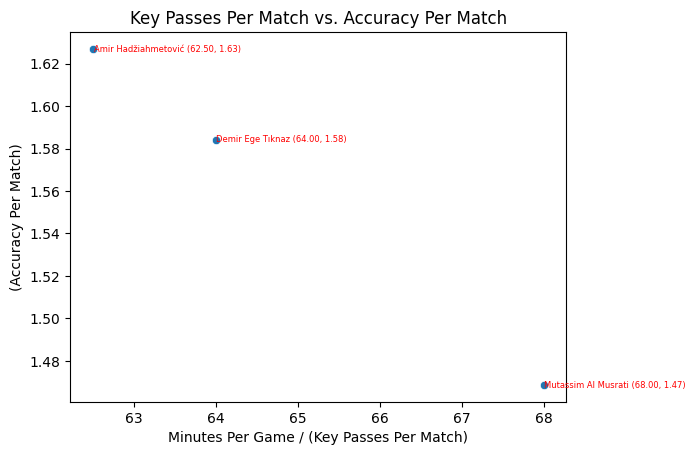

In [27]:
# Yeni değerleri hesapla ve DataFrame'e ekle
Al_Musrati_Demir_Amir['x_value2'] = (Al_Musrati_Demir_Amir['Minutes Per Game'])/ (Al_Musrati_Demir_Amir['Key Passes Per Match'])
Al_Musrati_Demir_Amir['y_value2'] = (Al_Musrati_Demir_Amir['Minutes Per Game'])/(Al_Musrati_Demir_Amir['Accuracy Per Match'])

# Saçılım grafiği çiz
sns.scatterplot(data=Al_Musrati_Demir_Amir, x="x_value2", y="y_value2")

# Oyuncu isimlerini noktaların yanına eklemek için plt.text kullan
for i in range(len(Al_Musrati_Demir_Amir)):
    plt.text(x=Al_Musrati_Demir_Amir.iloc[i]["x_value2"]+0.01,  # x koordinatı (+ biraz kaydırma)
             y=Al_Musrati_Demir_Amir.iloc[i]["y_value2"],  # y koordinatı
             s=f"{Al_Musrati_Demir_Amir.iloc[i]['Name']} ({Al_Musrati_Demir_Amir.iloc[i]['x_value2']:.2f}, {Al_Musrati_Demir_Amir.iloc[i]['y_value2']:.2f})",  # metin (oyuncu ismi ve değerler)
             fontdict=dict(color='red', size=6),  # metin özellikleri
             va='center')  # dikey hizalama

# Eksen etiketleri ve başlık ekle
plt.xlabel("Minutes Per Game / (Key Passes Per Match)")
plt.ylabel("(Accuracy Per Match)")
plt.title("Key Passes Per Match vs. Accuracy Per Match")

# Grafiği göster
plt.show()

Maç başına başarılı pas konusunda Musrati, Demir Ege ve Amir'den daha iyi bir konumda. Maç içerisinde daha sık başarılı pas atışında bulunmuş. Al Musrati 88 saniyede bir paşarılı pas atarken, Amir 97 saniye, Demir Ege ise 94 saniyede bir başarılı pas atmış. Kilit pas konusunda ise aralarında bariz bir fark yok. Ancak Amir diğer iki oyuncuya göre daha önde. Rakip sahadaki ve kendi sahalarındaki pas isabetlerini inceleyelim.

In [28]:
Al_Musrati_Demir_Amir.columns

Index(['Name', 'Expected Goals (xG)', 'Goals', 'Assists',
       'Expected Assists (xA)', 'Touching_Per_Match', 'Shots Per Match',
       'Shots Target Per Match', 'Minutes Per Game', 'Big Chance Missed',
       'Big Chance Created', 'Key Passes Per Match', 'Success Dribble(/100)',
       'Success Dribble Per Match', 'Accuracy Per Match', 'Accuracy (/100)',
       'Accuracy Long Ball Per Match', 'Accuracy Long Ball (/100)',
       'Total Played This Season', 'Accuracy Crosses Per Match',
       'Accuracy Crosses (/100)', 'Yellow Cards', 'Red Cards',
       'Penalties Committed', 'Was Fouled Per Match', 'Tackles Per Match',
       'Dribbled Past Per Match', 'Interceptions Per Match',
       'Clearances Per Match', 'Possession Won Per Match',
       'Accuracy Own Half Per Match', 'Accuracy Own Half (/100)',
       'Accuracy Opposite Half Per Match', 'Accuracy Opposite Half (/100)',
       'x_value', 'y_value', 'x_value1', 'y_value1', 'x_value2', 'y_value2'],
      dtype='object')

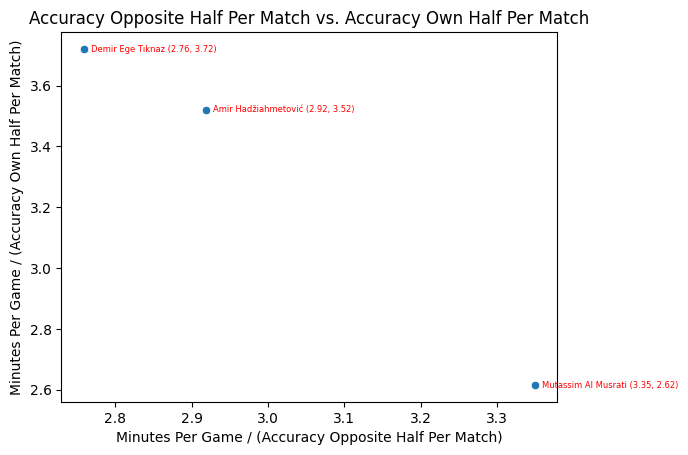

In [29]:
# Yeni değerleri hesapla ve DataFrame'e ekle
Al_Musrati_Demir_Amir['x_value3'] = (Al_Musrati_Demir_Amir['Minutes Per Game'])/ (Al_Musrati_Demir_Amir['Accuracy Opposite Half Per Match'])
Al_Musrati_Demir_Amir['y_value3'] = (Al_Musrati_Demir_Amir['Minutes Per Game'])/(Al_Musrati_Demir_Amir['Accuracy Own Half Per Match'])

# Saçılım grafiği çiz
sns.scatterplot(data=Al_Musrati_Demir_Amir, x="x_value3", y="y_value3")

# Oyuncu isimlerini noktaların yanına eklemek için plt.text kullan
for i in range(len(Al_Musrati_Demir_Amir)):
    plt.text(x=Al_Musrati_Demir_Amir.iloc[i]["x_value3"]+0.01,  # x koordinatı (+ biraz kaydırma)
             y=Al_Musrati_Demir_Amir.iloc[i]["y_value3"],  # y koordinatı
             s=f"{Al_Musrati_Demir_Amir.iloc[i]['Name']} ({Al_Musrati_Demir_Amir.iloc[i]['x_value3']:.2f}, {Al_Musrati_Demir_Amir.iloc[i]['y_value3']:.2f})",  # metin (oyuncu ismi ve değerler)
             fontdict=dict(color='red', size=6),  # metin özellikleri
             va='center')  # dikey hizalama

# Eksen etiketleri ve başlık ekle
plt.xlabel("Minutes Per Game / (Accuracy Opposite Half Per Match)")
plt.ylabel("Minutes Per Game / (Accuracy Own Half Per Match)")
plt.title("Accuracy Opposite Half Per Match vs. Accuracy Own Half Per Match")

# Grafiği göster
plt.show()

Evet görüldüğü gibi. Al Musrati daha çok oyunu geriden hazırlayarak gelen ve top kesen bir oyuncu. Bu oyuncuların yaptıkları pasların yüzde kaçı kendi sahasında yüzde kaçı rakip sahada onu inceleyelim.

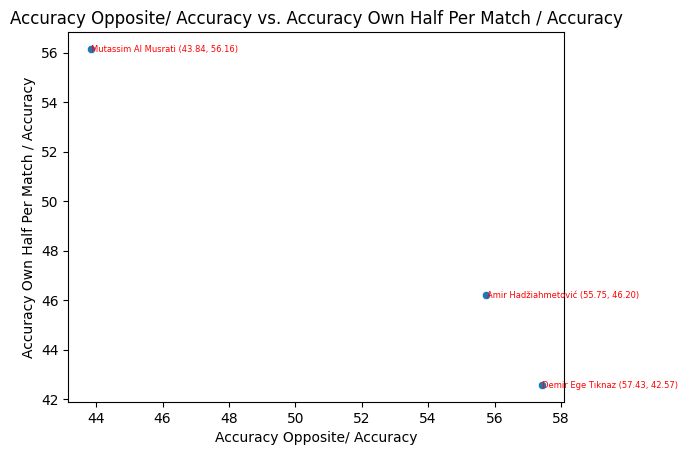

In [30]:
# Yeni değerleri hesapla ve DataFrame'e ekle
Al_Musrati_Demir_Amir['x_value6'] = ((Al_Musrati_Demir_Amir['Accuracy Opposite Half Per Match']))*100/(Al_Musrati_Demir_Amir['Accuracy Per Match'])
Al_Musrati_Demir_Amir['y_value6'] = (Al_Musrati_Demir_Amir['Accuracy Own Half Per Match']) *100/(((Al_Musrati_Demir_Amir['Accuracy Per Match'])))

# Saçılım grafiği çiz
sns.scatterplot(data=Al_Musrati_Demir_Amir, x="x_value6", y="y_value6")

# Oyuncu isimlerini noktaların yanına eklemek için plt.text kullan
for i in range(len(Al_Musrati_Demir_Amir)):
    plt.text(x=Al_Musrati_Demir_Amir.iloc[i]["x_value6"]+0.01,  # x koordinatı (+ biraz kaydırma)
             y=Al_Musrati_Demir_Amir.iloc[i]["y_value6"],  # y koordinatı
             s=f"{Al_Musrati_Demir_Amir.iloc[i]['Name']} ({Al_Musrati_Demir_Amir.iloc[i]['x_value6']:.2f}, {Al_Musrati_Demir_Amir.iloc[i]['y_value6']:.2f})",  # metin (oyuncu ismi ve değerler)
             fontdict=dict(color='red', size=6),  # metin özellikleri
             va='center')  # dikey hizalama

# Eksen etiketleri ve başlık ekle
plt.xlabel("Accuracy Opposite/ Accuracy")
plt.ylabel("Accuracy Own Half Per Match / Accuracy")
plt.title("Accuracy Opposite/ Accuracy vs. Accuracy Own Half Per Match / Accuracy")

# Grafiği göster
plt.show()

Al Musrati yaptığı başarılı pasların çok büyük bir kısmını kendi yarı sahasında yapmış. Defansif istatistiklerinin de iyi olması çok tipik bir 6 numara olduğunun göstergesi. Şimdi de oyuncuların yarattıkları pozisyonları inceleyelim.

In [31]:
Al_Musrati_Demir_Amir[['Name', 'Big Chance Created']]

,Name,Big Chance Created
12,Mutassim Al Musrati,0
13,Amir Hadžiahmetović,6
15,Demir Ege Tıknaz,0


Amir ciddi bir şekilde takımı için şans yaratmış. Ancak Al Musrati ve Ege bu istatistiğin biraz gerisinde kalmışlar. Hiç ciddi bir pozisyon yaratmamışlar takımları adına. Şimdi de Asist beklentilerini inceleyelim.

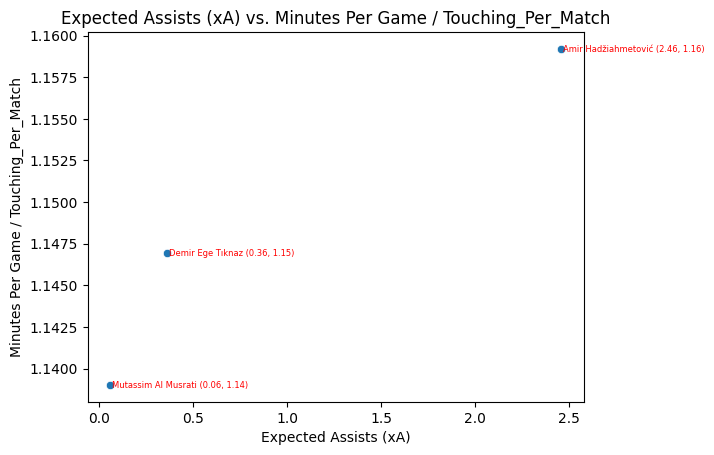

In [32]:
# Yeni değerleri hesapla ve DataFrame'e ekle
Al_Musrati_Demir_Amir['x_value6'] = (Al_Musrati_Demir_Amir['Expected Assists (xA)'])
Al_Musrati_Demir_Amir['y_value6'] = (Al_Musrati_Demir_Amir['Minutes Per Game'])/(Al_Musrati_Demir_Amir['Touching_Per_Match'])

# Saçılım grafiği çiz
sns.scatterplot(data=Al_Musrati_Demir_Amir, x="x_value6", y="y_value6")

# Oyuncu isimlerini noktaların yanına eklemek için plt.text kullan
for i in range(len(Al_Musrati_Demir_Amir)):
    plt.text(x=Al_Musrati_Demir_Amir.iloc[i]["x_value6"]+0.01,  # x koordinatı (+ biraz kaydırma)
             y=Al_Musrati_Demir_Amir.iloc[i]["y_value6"],  # y koordinatı
             s=f"{Al_Musrati_Demir_Amir.iloc[i]['Name']} ({Al_Musrati_Demir_Amir.iloc[i]['x_value6']:.2f}, {Al_Musrati_Demir_Amir.iloc[i]['y_value6']:.2f})",  # metin (oyuncu ismi ve değerler)
             fontdict=dict(color='red', size=6),  # metin özellikleri
             va='center')  # dikey hizalama

# Eksen etiketleri ve başlık ekle
plt.xlabel("Expected Assists (xA)")
plt.ylabel("Minutes Per Game / Touching_Per_Match")
plt.title("Expected Assists (xA) vs. Minutes Per Game / Touching_Per_Match")

# Grafiği göster
plt.show()

Hepsi topla buluşma konusunda hemen hemen benzer değerlere sahipler. Ancak Asist Beklentisi konusunda ciddi bir fark olduğu aşikar. Bir de uzun top istatistikleriyle bu durumu inceleyelim.

In [33]:
Al_Musrati_Demir_Amir.columns

Index(['Name', 'Expected Goals (xG)', 'Goals', 'Assists',
       'Expected Assists (xA)', 'Touching_Per_Match', 'Shots Per Match',
       'Shots Target Per Match', 'Minutes Per Game', 'Big Chance Missed',
       'Big Chance Created', 'Key Passes Per Match', 'Success Dribble(/100)',
       'Success Dribble Per Match', 'Accuracy Per Match', 'Accuracy (/100)',
       'Accuracy Long Ball Per Match', 'Accuracy Long Ball (/100)',
       'Total Played This Season', 'Accuracy Crosses Per Match',
       'Accuracy Crosses (/100)', 'Yellow Cards', 'Red Cards',
       'Penalties Committed', 'Was Fouled Per Match', 'Tackles Per Match',
       'Dribbled Past Per Match', 'Interceptions Per Match',
       'Clearances Per Match', 'Possession Won Per Match',
       'Accuracy Own Half Per Match', 'Accuracy Own Half (/100)',
       'Accuracy Opposite Half Per Match', 'Accuracy Opposite Half (/100)',
       'x_value', 'y_value', 'x_value1', 'y_value1', 'x_value2', 'y_value2',
       'x_value3', 'y_value3',

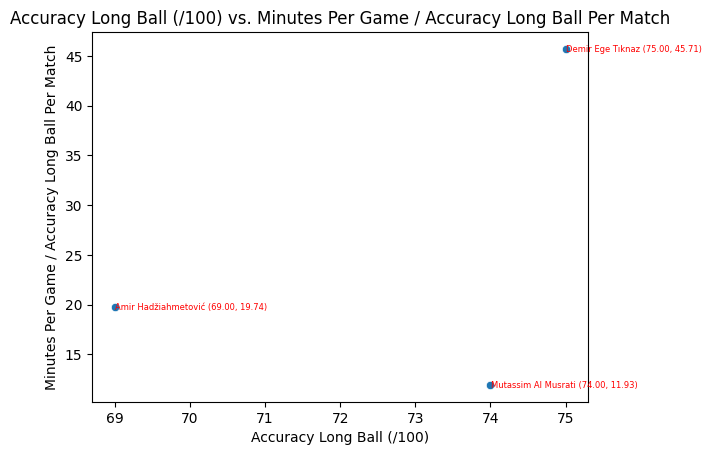

In [34]:
# Yeni değerleri hesapla ve DataFrame'e ekle
Al_Musrati_Demir_Amir['x_value6'] = (Al_Musrati_Demir_Amir['Accuracy Long Ball (/100)'])
Al_Musrati_Demir_Amir['y_value6'] = (Al_Musrati_Demir_Amir['Minutes Per Game'])/(Al_Musrati_Demir_Amir['Accuracy Long Ball Per Match'])

# Saçılım grafiği çiz
sns.scatterplot(data=Al_Musrati_Demir_Amir, x="x_value6", y="y_value6")

# Oyuncu isimlerini noktaların yanına eklemek için plt.text kullan
for i in range(len(Al_Musrati_Demir_Amir)):
    plt.text(x=Al_Musrati_Demir_Amir.iloc[i]["x_value6"]+0.01,  # x koordinatı (+ biraz kaydırma)
             y=Al_Musrati_Demir_Amir.iloc[i]["y_value6"],  # y koordinatı
             s=f"{Al_Musrati_Demir_Amir.iloc[i]['Name']} ({Al_Musrati_Demir_Amir.iloc[i]['x_value6']:.2f}, {Al_Musrati_Demir_Amir.iloc[i]['y_value6']:.2f})",  # metin (oyuncu ismi ve değerler)
             fontdict=dict(color='red', size=6),  # metin özellikleri
             va='center')  # dikey hizalama

# Eksen etiketleri ve başlık ekle
plt.xlabel("Accuracy Long Ball (/100)")
plt.ylabel("Minutes Per Game / Accuracy Long Ball Per Match")
plt.title("Accuracy Long Ball (/100) vs. Minutes Per Game / Accuracy Long Ball Per Match")

# Grafiği göster
plt.show()

İşte burada oyun kurma konusunda karşımıza ciddi bir istatistik çıkıyor. Al Musrati hem daha %74 gibi bir oranla başarılı uzun top atmış. Hem de diğer oyunculara göre daha yüksek bir sayıda başarılı uzun top istatistiğine sahip. Her maç yaklaşık 10 uzun top denemiş ve yaklaşık 7'si başarılı olmuş. İstatistiği açacak olursak iki maçta toplam 20 kere uzun top denemesinde bulunmuş ve 15 isabetli uzun top atmış. Aslında bu açıdan bakılacak olursak Al Musrati ileride takım arkadaşlarını doğrudan pozisyona sokacak bir futbolcu değil. Al Musrati geride rakip takımın ataklarını engelleyip, defans hattındaki pas trafiğini yönlendiren, kapanan bir takıma karşı oynanırken veya kilidi açılamamış bir savunmayla karşı karşıyayken attığı uzun paslar ile takım arkadaşlarının ön alanda oyun kurmasına yardımcı olacak bir oyuncu. Çünkü Amir daha çok ileri alanda pas yapan bir futbolcu. Ama Al Musrati'ye göre daha az sayıda başarılı uzun top atmış. Yani Amir iki maçta 13 uzun top denemesinde bulunur ve 9'u başarılı olur. Daha az sayıda uzun top denemesine rağmen isabet oranı Al Musrati'ye göre düşük bir seviyede. Çünkü Amir savunmanın arasına giren bir 6-8 numara. Ancak Al Musrati daha çok gezgin bir rolde oynayıp hem geride hem ileride koordinasyonu ve oyun kurulumunu sağlayan bir futbolcu. Demir Ege'ye gelecek olursak iki maç açısından bakınca 5 uzun topunun yaklaşık 4'ü başarılı olmuş. Oran olarak çok başarılı olsa da sayı anlamında ciddi bir eksik.
> İstatistiklerin net açıdan anlaşılması için bir maç değil de iki maçta totalde nasıl bir istatistik değerlendirmesi yapılmıştır. Sayıların ciddi oranda kesirli olmasından kaynaklanan bir durumdur.

**YENİ TRANSFER AL MUSRATİ**

In [35]:
#Öncelikle forvetler için verileri alalım
bjk_forward = ["Vincent Aboubakar","Ante Rebić","Jackson Muleka","Semih Kılıçsoy","Ernest Muçi","Mustafa Hekimoglu","Cenk Tosun"]
bjk_forward = df[df['Name'].isin(bjk_forward)][["Name", "Expected Goals (xG)", "Goals" , "Assists", "Expected Assists (xA)", "Touching_Per_Match", "Shots Per Match", "Shots Target Per Match", "Minutes Per Game", "Big Chance Missed", "Big Chance Created", "Key Passes Per Match","Success Dribble(/100)","Success Dribble Per Match","Accuracy Per Match","Accuracy (/100)","Accuracy Long Ball Per Match","Accuracy Long Ball (/100)","Total Played This Season","Accuracy Crosses Per Match","Accuracy Crosses (/100)","Yellow Cards" , "Red Cards", "Penalties Committed", "Was Fouled Per Match","Tackles Per Match", "Dribbled Past Per Match" , "Interceptions Per Match", "Clearances Per Match","Possession Won Per Match","Accuracy Own Half Per Match","Accuracy Own Half (/100)", "Accuracy Opposite Half Per Match","Accuracy Opposite Half (/100)"]]

print(bjk_forward)

                 Name  Expected Goals (xG)  Goals  Assists  \
0   Vincent Aboubakar                 2.62      4        1   
1          Ante Rebić                 0.27      0        3   
2      Jackson Muleka                 3.64      2        0   
3      Semih Kılıçsoy                 4.06      9        2   
4         Ernest Muçi                 0.57      1        0   
5   Mustafa Hekimoglu                 0.00      0        0   
10         Cenk Tosun                 6.90      5        3   

    Expected Assists (xA)  Touching_Per_Match  Shots Per Match  \
0                    1.04                23.5              1.6   
1                    2.00                17.7              0.5   
2                    0.83                27.8              1.9   
3                    1.06                29.4              2.8   
4                    0.25                54.0              4.0   
5                    0.00                 6.0              0.0   
10                   0.98                

Hemen gol beklentileri ve attıkları gol sayılarına bakalım.

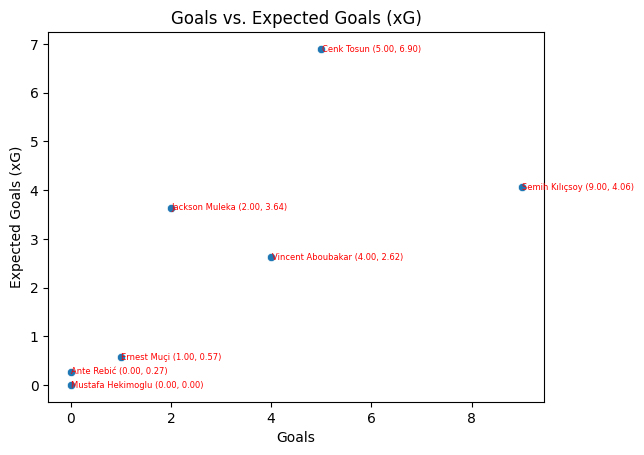

In [36]:
# Yeni değerleri hesapla ve DataFrame'e ekle
bjk_forward['x_value'] = (bjk_forward['Goals'])
bjk_forward['y_value'] = (bjk_forward['Expected Goals (xG)'])

# Saçılım grafiği çiz
sns.scatterplot(data=bjk_forward, x="x_value", y="y_value")

# Oyuncu isimlerini noktaların yanına eklemek için plt.text kullan
for i in range(len(bjk_forward)):
    plt.text(x=bjk_forward.iloc[i]["x_value"]+0.01,  # x koordinatı (+ biraz kaydırma)
             y=bjk_forward.iloc[i]["y_value"],  # y koordinatı
             s=f"{bjk_forward.iloc[i]['Name']} ({bjk_forward.iloc[i]['x_value']:.2f}, {bjk_forward.iloc[i]['y_value']:.2f})",  # metin (oyuncu ismi ve değerler)
             fontdict=dict(color='red', size=6),  # metin özellikleri
             va='center')  # dikey hizalama

# Eksen etiketleri ve başlık ekle
plt.xlabel("Goals")
plt.ylabel("Expected Goals (xG)")
plt.title("Goals vs. Expected Goals (xG)")

# Grafiği göster
plt.show()

Rebic çok az gol beklentisine sahip ve hiç gol atamamış. Aynı şekilde Mustafa Hekimoğlu hiç gol beklentisine sahip değil. Ancak inceleyecek olursak Muleka çok ciddi bir gol beklentisine sahip. Ve beklentilerin yarısında bir performans gösterebilmiş. Aboubakar yine xG üstünde bir istatistik gösterirken, Semih Kılıçsoy xG istatistiğinin iki katından daha fazla gol atmış. Hadi şimdi bu futbolcuların biraz da teknik özelliklerini inceleyelim.

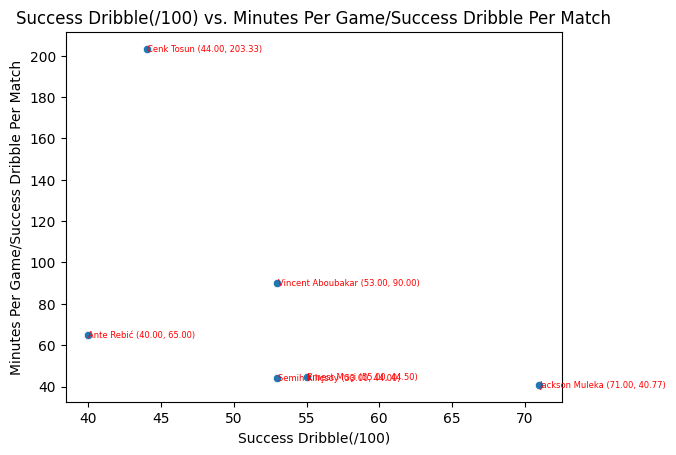

In [37]:
# Yeni değerleri hesapla ve DataFrame'e ekle
bjk_forward['x_value1'] = (bjk_forward['Success Dribble(/100)'])
bjk_forward['y_value1'] = (bjk_forward['Minutes Per Game'])/(bjk_forward['Success Dribble Per Match'])

# Saçılım grafiği çiz
sns.scatterplot(data=bjk_forward, x="x_value1", y="y_value1")

# Oyuncu isimlerini noktaların yanına eklemek için plt.text kullan
for i in range(len(bjk_forward)):
    plt.text(x=bjk_forward.iloc[i]["x_value1"]+0.01,  # x koordinatı (+ biraz kaydırma)
             y=bjk_forward.iloc[i]["y_value1"],  # y koordinatı
             s=f"{bjk_forward.iloc[i]['Name']} ({bjk_forward.iloc[i]['x_value1']:.2f}, {bjk_forward.iloc[i]['y_value1']:.2f})",  # metin (oyuncu ismi ve değerler)
             fontdict=dict(color='red', size=6),  # metin özellikleri
             va='center')  # dikey hizalama

# Eksen etiketleri ve başlık ekle
plt.xlabel("Success Dribble(/100)")
plt.ylabel("Minutes Per Game/Success Dribble Per Match")
plt.title("Success Dribble(/100) vs. Minutes Per Game/Success Dribble Per Match")

# Grafiği göster
plt.show()

Semih, Muçi ve Jackson Muleka diğer forvetlere göre çok daha fazla sayıda başarılı çalıma sahipler. Semih her maç yaklaşık 3-4 arası çalım denemesinde bulunup yarısından çoğunda genellikle başarılı olmuş. Muçi ile çok benzer istatistiklere sahipler. Ama Muleka'ya gelecek olursak Muleka da Semih ve Muçi kadar dribling denemesinde bulunmuş ama Semih ve Muçi'ye göre neredeyse onlardan 1,5 kat daha iyi bir başarı oranına sahip. Aboubakar ise her maç yaklaşık 2 çalım deniyor ve 1'i başarılı oluyor tarzında bir istatistiğe sahibiz. Yani diğer oyunculara göre en az çalım denemesinde bulunan oyuncu Aboubakar. Rebic'e gelecek olursak Semih,Muçi ve Muleka kadar çalım denemesinde bulunuyor. Ama çalım konusundaki başarı oranında diğer oyunculara nazaran biraz daha kötü durumda. Şimdi de pas trafiğinde bu oyuncuların önemini inceleyelim.

/opt/conda/lib/python3.10/site-packages/matplotlib/transforms.py:365: RuntimeWarning: invalid value encountered in scalar subtract
  return points[1, 0] - points[0, 0]


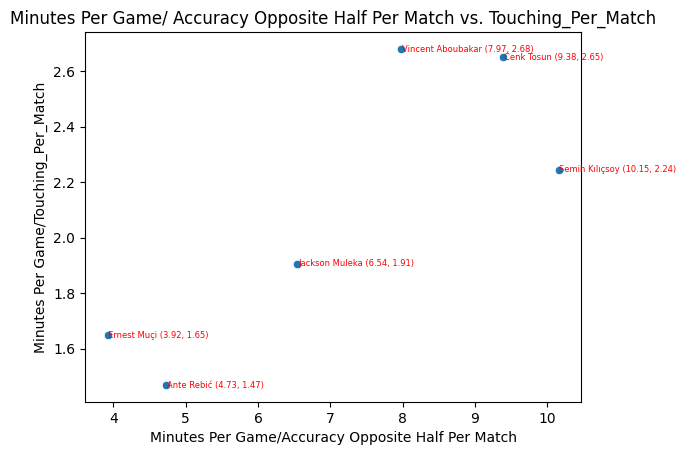

In [38]:
# Yeni değerleri hesapla ve DataFrame'e ekle
bjk_forward['x_value2'] = (bjk_forward['Minutes Per Game'])/(bjk_forward['Accuracy Opposite Half Per Match'])
bjk_forward['y_value2'] = (bjk_forward['Minutes Per Game'])/(bjk_forward['Touching_Per_Match'])

# Saçılım grafiği çiz
sns.scatterplot(data=bjk_forward, x="x_value2", y="y_value2")

# Oyuncu isimlerini noktaların yanına eklemek için plt.text kullan
for i in range(len(bjk_forward)):
    plt.text(x=bjk_forward.iloc[i]["x_value2"]+0.01,  # x koordinatı (+ biraz kaydırma)
             y=bjk_forward.iloc[i]["y_value2"],  # y koordinatı
             s=f"{bjk_forward.iloc[i]['Name']} ({bjk_forward.iloc[i]['x_value2']:.2f}, {bjk_forward.iloc[i]['y_value2']:.2f})",  # metin (oyuncu ismi ve değerler)
             fontdict=dict(color='red', size=6),  # metin özellikleri
             va='center')  # dikey hizalama

# Eksen etiketleri ve başlık ekle
plt.xlabel("Minutes Per Game/Accuracy Opposite Half Per Match")
plt.ylabel("Minutes Per Game/Touching_Per_Match")
plt.title("Minutes Per Game/ Accuracy Opposite Half Per Match vs. Touching_Per_Match")

# Grafiği göster
plt.show()

Muçi topla en fazla buluşan ikinci oyuncu ve rakip sahada başarılı pas yapma konusunda diğer oyunculardan daha iyi bir durumda. Peki başarı oranları ne durumda?

In [39]:
bjk_forward.columns

Index(['Name', 'Expected Goals (xG)', 'Goals', 'Assists',
       'Expected Assists (xA)', 'Touching_Per_Match', 'Shots Per Match',
       'Shots Target Per Match', 'Minutes Per Game', 'Big Chance Missed',
       'Big Chance Created', 'Key Passes Per Match', 'Success Dribble(/100)',
       'Success Dribble Per Match', 'Accuracy Per Match', 'Accuracy (/100)',
       'Accuracy Long Ball Per Match', 'Accuracy Long Ball (/100)',
       'Total Played This Season', 'Accuracy Crosses Per Match',
       'Accuracy Crosses (/100)', 'Yellow Cards', 'Red Cards',
       'Penalties Committed', 'Was Fouled Per Match', 'Tackles Per Match',
       'Dribbled Past Per Match', 'Interceptions Per Match',
       'Clearances Per Match', 'Possession Won Per Match',
       'Accuracy Own Half Per Match', 'Accuracy Own Half (/100)',
       'Accuracy Opposite Half Per Match', 'Accuracy Opposite Half (/100)',
       'x_value', 'y_value', 'x_value1', 'y_value1', 'x_value2', 'y_value2'],
      dtype='object')

/opt/conda/lib/python3.10/site-packages/matplotlib/transforms.py:365: RuntimeWarning: invalid value encountered in scalar subtract
  return points[1, 0] - points[0, 0]


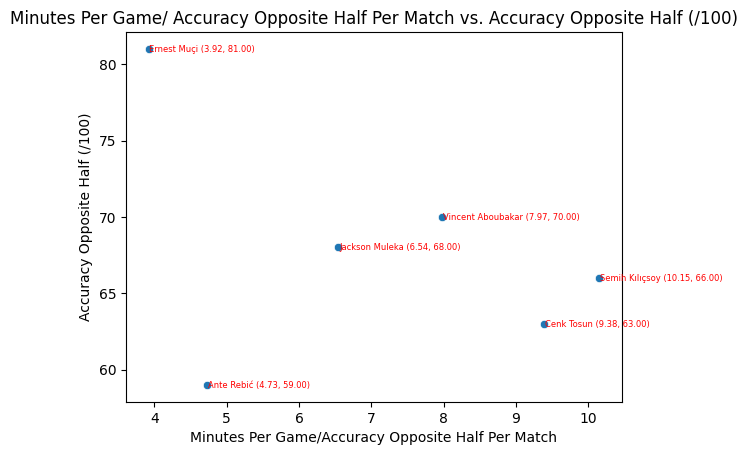

In [40]:
# Yeni değerleri hesapla ve DataFrame'e ekle
bjk_forward['x_value2'] = (bjk_forward['Minutes Per Game'])/(bjk_forward['Accuracy Opposite Half Per Match'])
bjk_forward['y_value2'] = (bjk_forward['Accuracy Opposite Half (/100)'])

# Saçılım grafiği çiz
sns.scatterplot(data=bjk_forward, x="x_value2", y="y_value2")

# Oyuncu isimlerini noktaların yanına eklemek için plt.text kullan
for i in range(len(bjk_forward)):
    plt.text(x=bjk_forward.iloc[i]["x_value2"]+0.01,  # x koordinatı (+ biraz kaydırma)
             y=bjk_forward.iloc[i]["y_value2"],  # y koordinatı
             s=f"{bjk_forward.iloc[i]['Name']} ({bjk_forward.iloc[i]['x_value2']:.2f}, {bjk_forward.iloc[i]['y_value2']:.2f})",  # metin (oyuncu ismi ve değerler)
             fontdict=dict(color='red', size=6),  # metin özellikleri
             va='center')  # dikey hizalama

# Eksen etiketleri ve başlık ekle
plt.xlabel("Minutes Per Game/Accuracy Opposite Half Per Match")
plt.ylabel("Accuracy Opposite Half (/100)")
plt.title("Minutes Per Game/ Accuracy Opposite Half Per Match vs. Accuracy Opposite Half (/100)")

# Grafiği göster
plt.show()

Muçi oynadığı süre içerisinde diğer oyunculara göre daha fazla başarılı pas yapmış, ayrıca diğer oyunculara göre daha fazla bir isabet oranına sahip. Muçi ileri alanda her maç yaklaşık 28 pas denemesinde bulunmuş ve bunların yaklaşık 23'ünde başarılı olmuş. Diğer futbolculara göre gayet önemli bir istatistik. İleri alanda daha sık pas yapan ikinci isim Rebic'e geçecek olursak, Rebic her maç ileri alanda yaklaşık 32 pas denemesinde bulunmuş ancak yaklaşık 19 pasında sadece isabetli pas atabilmiş. 

Bu istatistiklere bakınca; 
* Öncelikle Muçi çok tipik bir 10 numara oyuncusu. Dribling konusunda başarılı, ileri alanda pas yapabiliyor ayrıca ileri alanda yaptığı paslarda ciddi bir isabetlilik mevcut.
* Semih Kılıçsoy'a bakacak olursak, Semih gol konusunda beklentilerin çok çok üzerinde bir performans sergilemiş, kaliteli bir bitirici olduğunu bizlere göstermiştir. Oyun kurulumu konusunda çok başarılı bir futbolcu olarak gözükmese de kenar kısımda kanat forvet de oynayabilecek bir oyuncudur. Çünkü dribling konusunda başarılı. Ama pas oyunundaki isabet ve deneme sayılarından dolayı oyun kurulumunda kullanılabilecek bir oyuncu değil. Kanat forvet ve Yaratıcı Forvet pozisyon ve görevlerinde çok daha başarılı olacaktır.
* Rebic için konuşmak gerekirse, çalım konusunda önceki maddelerdeki iki oyuncu kadar denemesi var ancak çok başarılı olduğu söylenemez. Gol beklentisi konusunda da biraz düşük bir seviyede. Gol olma ihtimali çok düşük olan pozisyonlardan skor elde edememiş. Topla buluşma konusunda en iyilerden bir futbolcu olmasına rağmen başarılı pas ve dribling konusunda ciddi sıkıntıları var.
* Muleka'ya bakarsak, oyun kurulumu kısmında çok başarılı değil ancak ortalama istatistiklere sahip. Ama dripling konusunda hem çok başarılı hem de sık sık deneyen bir futbolcu. Bitiricilik konusuna gelecek olursak gol olma ihtimali yüksek pozisyonları değerlendiremediği aşikar. 3.64 xG için yalnızca iki gol bir hücumcu için kötü bir performanstır. Muleka'dan verim almak için kanatlara açılan bir gölge santrafor mantıklı olabilir. Çünkü oyuncu kanattan oyun kurabilecek pas yeteneğine sahip değil. Kanat forvet ya da Santrafor olabilecek düzeyde iyi bir bitiriciliğe de sahip değil. Ancak santrafor pozisyonunda oynayıp, kanatlara açılsa ve adam eksilterek takımına yardımcı olsa, dripling sonrası basit paslar ile takımını hücuma sürüklese daha fazla verim sağlayabilir.
* Aboubakar konusunda ise, oyunun kurulum aşamasında çok fazla bulunabilecek bir futbolcu olmadığı bariz. Bitiricilik konusunda forvetler arasında en başarılı 2. oyuncu diyebiliriz. Dripling konusunda çok fazla bir denemesi yok. Her maç sadece yaklaşık 2 dripling denemesinde bulunuyor. Santrafor oynayabileceği en iyi pozisyon ama kendisini daha fazla gol pozisyonuna sokması gerekiyor. 
* Cenk'in ise, bitiricilik konusunda zayıflıkları mevcut. Gol beklentisi daha yüksek pozisyonlara girip bu fırsatları değerlendirememiş. Dripling konusunda ise en kötü oyunculardan birisi. Hem çok az dripling deniyor. Hem de başarı oranı cidden çok düşük. Topla çok fazla buluşamıyor ve oransal olarak bakıldığında topla yaklaşık her 3 buluşmasının yalnızca birinde isabetli pas veriyor. Kanat olarak oyun kuramayabilir, pas istatistikleri ortalama altında. Kanattan dripling yapıp içeri bindiremez çünkü dripling oranları da ciddi derecede düşük. Ayrıca santrafor olarak oynadığı senaryolarda ona gelen fırsatları daha iyi değerlendirmesi lazım. Cenk Tosun bitiricilik konusunda kendini geliştirmediği sürece tercih edilme sıklığı değişmelidir. Çünkü istatistiklere göre kanattan ne oyun kurabilecek ne de içeri devrilebilecek kapasiteye sahip bir futbolcu değil. Santrafor olarak ise tek yapması gereken girdiği pozisyonlardaki başarı oranlarını arttırmak olacaktır. Çünkü bitiricilik konusunda istatistiksel anlamda da ciddi sıkıntıları mevcut.